In [38]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 7]

In [39]:
with open ('../data/highway_map.csv') as f:
    map_df = pd.read_table(f, sep=' ', header=0, names=['x','y','s','dx','dy'], lineterminator='\n')

In [40]:
maps_df=map_df.head(n=6).tail(n=3)

In [41]:
# initial car details
x0=909.48 
y0=1128.67 
vx0=0 
vy0=0 
v0=0 
yaw0=0 
s0=124.834
d0=6.16483
speed0=0 

nextx=[
    909.48,909.479,909.479,909.482,909.489,909.503,909.525,909.557,909.602,909.661,909.734,909.825,909.933,910.061,910.209,910.378,910.57,910.785,911.024,911.288,911.577,911.891,912.233,912.6,912.995,913.417,913.866,914.342,914.846,915.377,915.935,916.52,917.133,917.771,918.436,919.126,919.842,920.583,921.348,922.136,922.947,923.781,924.637,925.513,926.409,927.325,928.259,929.211,930.179,931.162,932.161,933.173,934.198,935.234,936.278,937.332,938.393,939.463,940.538,941.618,942.703,943.79,944.879,945.969,947.059,948.147,949.233,950.315,951.393,952.465,953.531,954.589,955.639,956.68,957.71,958.729,959.736,960.73,961.71,962.676,963.627,964.563,965.482,966.384,967.269,968.136,968.985,969.815,970.626,971.418,972.19,972.943,973.676,974.389,975.083,975.757,976.412,977.048,977.666,978.266,978.849,979.414,979.964,980.498,981.018,981.525,982.019,982.503,982.977,983.442,983.9,984.353
]
nexty=[
    1128.67,1128.61,1128.61,1128.61,1128.61,1128.61,1128.61,1128.61,1128.61,1128.61,1128.61,1128.61,1128.61,1128.61,1128.6,1128.6,1128.6,1128.6,1128.6,1128.6,1128.6,1128.6,1128.6,1128.6,1128.6,1128.6,1128.59,1128.59,1128.59,1128.59,1128.59,1128.59,1128.59,1128.59,1128.6,1128.6,1128.6,1128.61,1128.61,1128.62,1128.63,1128.64,1128.65,1128.66,1128.68,1128.7,1128.72,1128.74,1128.77,1128.8,1128.84,1128.88,1128.92,1128.97,1129.03,1129.09,1129.16,1129.23,1129.31,1129.4,1129.49,1129.58,1129.68,1129.78,1129.89,1130,1130.12,1130.24,1130.36,1130.49,1130.62,1130.75,1130.89,1131.03,1131.17,1131.31,1131.45,1131.6,1131.74,1131.89,1132.04,1132.19,1132.33,1132.47,1132.61,1132.75,1132.88,1133.02,1133.16,1133.29,1133.43,1133.56,1133.7,1133.83,1133.96,1134.09,1134.22,1134.34,1134.47,1134.59,1134.71,1134.83,1134.95,1135.06,1135.18,1135.29,1135.4,1135.51,1135.62,1135.73,1135.84,1135.95
]

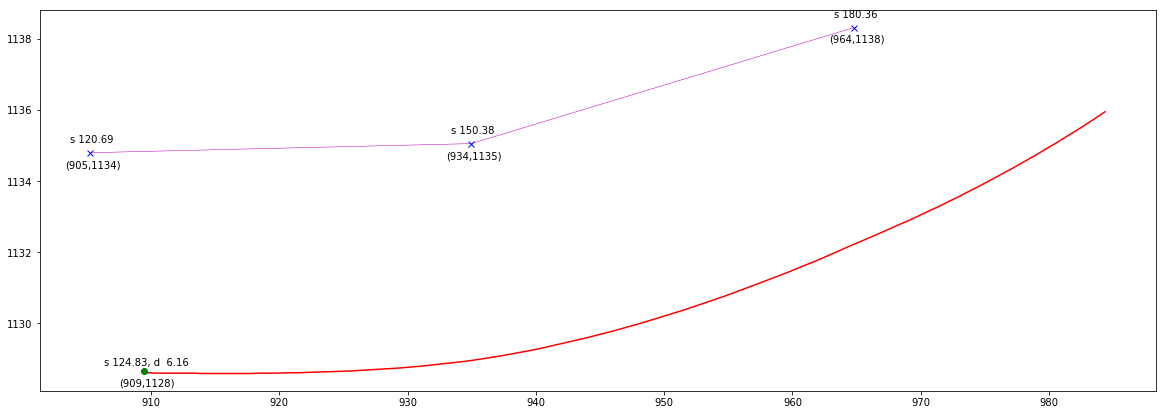

In [42]:
# plot waypoints and vehicle direction in map space
plt.figure()
plt.plot(maps_df.x,maps_df.y,linewidth=.5,color='m')
plt.plot(maps_df.x,maps_df.y,'bx')
plt.plot(nextx,nexty,'r-')

for s, x, y in zip( maps_df.s, maps_df.x, maps_df.y):
    plt.annotate('s %5.2f' % s, xy=(x, y), xytext=(-20, 10),textcoords='offset points')
    plt.annotate('(%d,%d)' % (x,y), xy=(x, y), xytext=(-25, -15),textcoords='offset points')

plt.plot()

plt.plot(x0,y0,'go')
plt.annotate('s %5.2f, d %5.2f' % (s0,d0), xy=(x0, y0), xytext=(-40, 5),textcoords='offset points')
plt.annotate('(%d,%d)' % (x0,y0), xy=(x0, y0), xytext=(-25, -15),textcoords='offset points')

In [43]:
x=909.482
y= 1128.61
vx=0.440849
vy=-3.11958
v=3.15057
yaw=4.85278
s=124.835
d=6.22783
speed=7.04763

nextx=[
     909.482,909.489,909.503,909.525,909.557,909.602,909.66,910.938,911.375,911.864,912.401,912.986,913.616,914.29,915.006,915.763,916.558,917.39,918.257,919.158,920.092,921.055,922.047,923.066,924.111,925.179,926.27,927.382,928.513,929.661,930.826,932.006,933.199,934.403,935.618,936.838,938.066,939.3,940.539,941.782,943.026,944.272,945.517,946.761,948.002,949.24,950.472,951.699,952.919,954.131,955.333,956.526,957.708,958.878,960.036,961.181,962.311,963.427,964.527,965.611,966.678,967.727,968.759,969.772,970.767,971.742,972.697,973.632,974.546,975.44,976.313,977.165,977.996,978.805,979.594,980.362,981.109,981.836,982.542,983.228,983.895,984.542,985.171,985.782,986.375,986.951,987.511,988.056,988.586,989.102,989.605,990.097,990.577
]
nexty=[
    1128.61,1128.61,1128.61,1128.61,1128.61,1128.61,1128.61,1128.54,1128.53,1128.53,1128.53,1128.52,1128.52,1128.52,1128.52,1128.52,1128.52,1128.52,1128.52,1128.52,1128.52,1128.53,1128.53,1128.54,1128.56,1128.57,1128.59,1128.61,1128.64,1128.67,1128.71,1128.75,1128.79,1128.84,1128.9,1128.97,1129.05,1129.14,1129.23,1129.33,1129.43,1129.54,1129.66,1129.78,1129.91,1130.04,1130.18,1130.32,1130.47,1130.62,1130.78,1130.94,1131.1,1131.27,1131.43,1131.6,1131.78,1131.95,1132.12,1132.3,1132.47,1132.63,1132.8,1132.97,1133.14,1133.31,1133.48,1133.65,1133.82,1133.99,1134.16,1134.34,1134.51,1134.68,1134.84,1135.01,1135.18,1135.34,1135.51,1135.67,1135.83,1135.98,1136.14,1136.29,1136.44,1136.59,1136.74,1136.88,1137.03,1137.17,1137.31,1137.44,1137.58
]

In [44]:
#maps_df=map_df.head(n=52).tail(n=3)
maps_df=map_df.head(n=7).tail(n=4)

[]

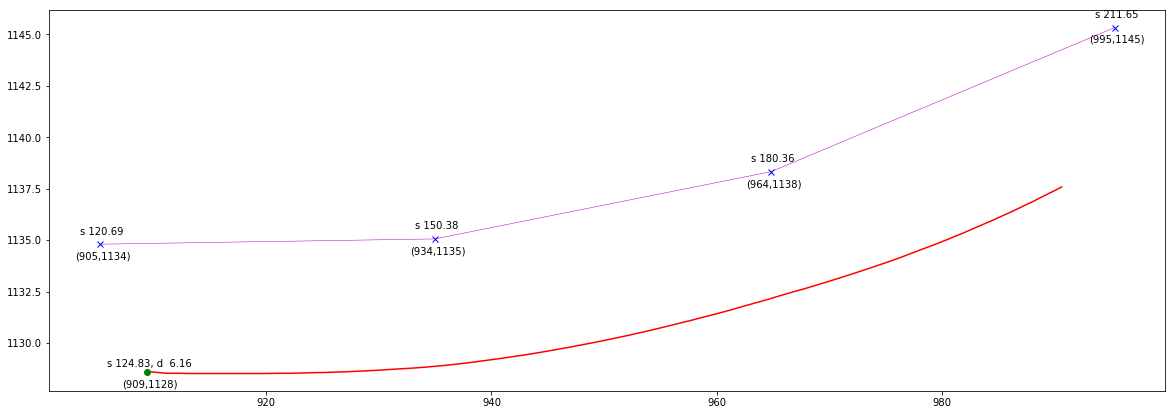

In [45]:
# plot waypoints and vehicle direction in map space
plt.figure()
plt.plot(maps_df.x,maps_df.y,linewidth=.5,color='m')
plt.plot(maps_df.x,maps_df.y,'bx')
plt.plot(nextx,nexty,'r-')
plt.plot(x,y,'go')

plt.annotate('s %5.2f, d %5.2f' % (s0,d0), xy=(x, y), xytext=(-40, 5),textcoords='offset points')
plt.annotate('(%d,%d)' % (x,y), xy=(x, y), xytext=(-25, -15),textcoords='offset points')

for s, x, y in zip( maps_df.s, maps_df.x, maps_df.y):
    plt.annotate('s %5.2f' % s, xy=(x, y), xytext=(-20, 10),textcoords='offset points')
    plt.annotate('(%d,%d)' % (x,y), xy=(x, y), xytext=(-25, -15),textcoords='offset points')

plt.plot()



In [46]:
x=917.45
y=1128.42
vx=-63.7847
vy=0.632571
v=63.7879
yaw=3.13168
s=132.802
d=6.48176
speed=142.689

nextx=[
     917.45,909.606,909.728,911.386,911.691,912.492,912.989,935.129,940.726,947.121,954.253,962.033,970.351,979.05,987.924,996.747,1005.31,1013.53,1021.38,1028.82,1035.79,1042.11,1047.69,1052.49
]
nexty=[
    1128.42,1128.49,1128.49,1128.46,1128.46,1128.45,1128.45,1128.6,1128.97,1129.54,1130.36,1131.45,1132.77,1134.43,1136.56,1139.21,1142.37,1145.88,1149.44,1152.72,1155.54,1158.09,1160.38,1162.4
]

In [47]:
maps_df=map_df.head(n=7).tail(n=4)

[]

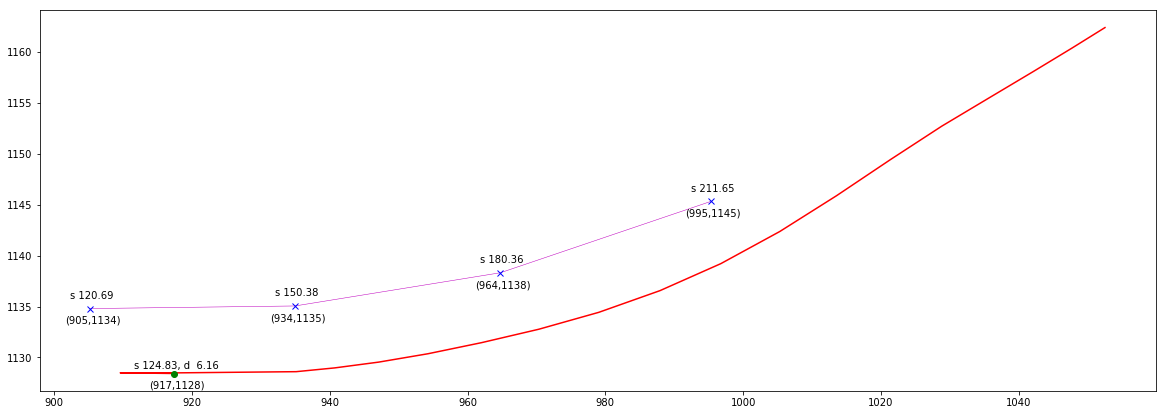

In [48]:
# plot waypoints and vehicle direction in map space
plt.figure()
plt.plot(maps_df.x,maps_df.y,linewidth=.5,color='m')
plt.plot(maps_df.x,maps_df.y,'bx')
plt.plot(nextx,nexty,'r-')
plt.plot(x,y,'go')

plt.annotate('s %5.2f, d %5.2f' % (s0,d0), xy=(x, y), xytext=(-40, 5),textcoords='offset points')
plt.annotate('(%d,%d)' % (x,y), xy=(x, y), xytext=(-25, -15),textcoords='offset points')

for s, x, y in zip( maps_df.s, maps_df.x, maps_df.y):
    plt.annotate('s %5.2f' % s, xy=(x, y), xytext=(-20, 10),textcoords='offset points')
    plt.annotate('(%d,%d)' % (x,y), xy=(x, y), xytext=(-25, -15),textcoords='offset points')

plt.plot()

In [35]:
x=910.337
y=1128.54
vx= 5.79545
vy=-0.0233758
v=5.79549
yaw=6.27915
s=125.69
d= 6.30225
speed=12.9642

nextx=[
     910.337,910.464,910.601,910.75,910.91,911.082,911.265,911.307,911.519,911.746,911.987,912.243,912.513,912.798,913.098,913.411,913.739,914.082,914.438,914.808,915.192,915.59,916.001,916.426,916.864,917.316,917.78,918.257,918.747,919.25,919.765,920.292,920.83,921.381,921.943,922.516,923.101,923.696,924.302,924.919,925.545,926.182,926.828,927.484,928.148,928.822,929.504,930.195,930.894,931.601,932.315,933.037,933.766,934.501,935.243,935.989,936.741,937.498,938.261,939.028,939.8,940.577,941.358,942.142,942.93,943.721,944.515,945.311,946.11,946.911,947.714,948.518,949.323,950.13,950.936,951.743,952.551,953.357,954.164,954.969,955.774,956.577,957.379,958.178,958.976,959.771,960.564,961.354,962.14,962.924,963.704,964.48,965.252,966.02,966.783,967.542,968.296,969.045,969.788,970.526,971.259,971.985,972.706,973.42,974.128,974.829,975.524,976.211,976.892,977.566,978.233,978.892,979.544,980.189,980.826,981.455,982.077,982.692,983.299,983.898,984.49,985.075,985.651,986.221,986.783,987.337,987.885,988.425,988.958,989.484,990.004,990.516,991.023,991.523,992.017,992.504,992.987,993.463,993.934,994.401,994.862,995.319,995.772,996.221
]
nexty=[
    1128.54,1128.54,1128.54,1128.54,1128.54,1128.54,1128.54,1128.46,1128.46,1128.46,1128.45,1128.45,1128.45,1128.45,1128.45,1128.45,1128.45,1128.45,1128.45,1128.44,1128.44,1128.44,1128.44,1128.44,1128.44,1128.44,1128.44,1128.44,1128.45,1128.45,1128.45,1128.45,1128.46,1128.46,1128.47,1128.47,1128.48,1128.49,1128.49,1128.5,1128.52,1128.53,1128.54,1128.55,1128.57,1128.59,1128.61,1128.63,1128.65,1128.68,1128.7,1128.73,1128.76,1128.8,1128.83,1128.87,1128.92,1128.97,1129.02,1129.07,1129.13,1129.19,1129.25,1129.32,1129.38,1129.45,1129.53,1129.6,1129.68,1129.76,1129.85,1129.93,1130.02,1130.11,1130.2,1130.3,1130.4,1130.5,1130.6,1130.71,1130.81,1130.92,1131.03,1131.14,1131.26,1131.37,1131.49,1131.61,1131.73,1131.85,1131.98,1132.1,1132.23,1132.35,1132.47,1132.59,1132.71,1132.83,1132.96,1133.08,1133.21,1133.34,1133.47,1133.6,1133.73,1133.86,1134,1134.13,1134.27,1134.41,1134.55,1134.68,1134.82,1134.96,1135.11,1135.25,1135.39,1135.53,1135.68,1135.82,1135.96,1136.11,1136.25,1136.4,1136.54,1136.69,1136.83,1136.98,1137.12,1137.27,1137.41,1137.56,1137.7,1137.85,1137.99,1138.14,1138.29,1138.43,1138.58,1138.72,1138.87,1139.02,1139.16,1139.31
]

In [36]:
maps_df=map_df.head(n=7).tail(n=4)

[]

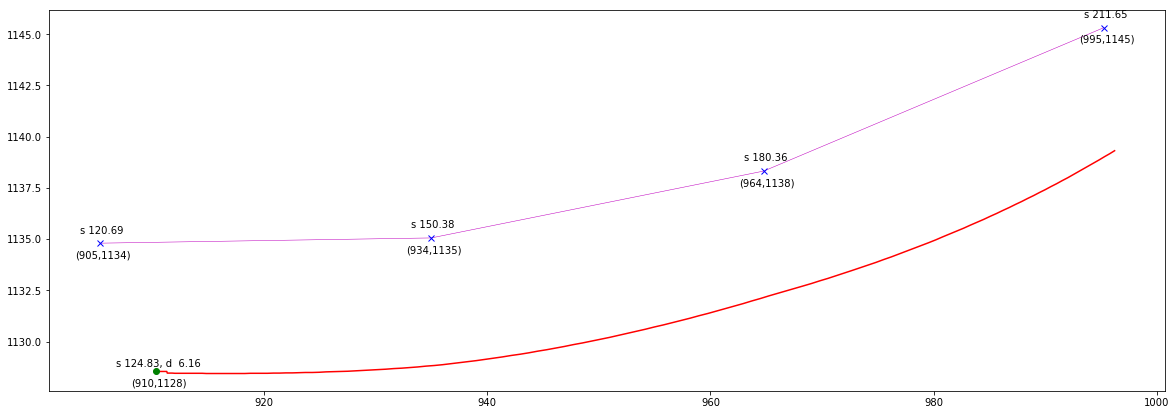

In [37]:
# plot waypoints and vehicle direction in map space
plt.figure()
plt.plot(maps_df.x,maps_df.y,linewidth=.5,color='m')
plt.plot(maps_df.x,maps_df.y,'bx')
plt.plot(nextx,nexty,'r-')
plt.plot(x,y,'go')

plt.annotate('s %5.2f, d %5.2f' % (s0,d0), xy=(x, y), xytext=(-40, 5),textcoords='offset points')
plt.annotate('(%d,%d)' % (x,y), xy=(x, y), xytext=(-25, -15),textcoords='offset points')

for s, x, y in zip( maps_df.s, maps_df.x, maps_df.y):
    plt.annotate('s %5.2f' % s, xy=(x, y), xytext=(-20, 10),textcoords='offset points')
    plt.annotate('(%d,%d)' % (x,y), xy=(x, y), xytext=(-25, -15),textcoords='offset points')

plt.plot()